In [70]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float

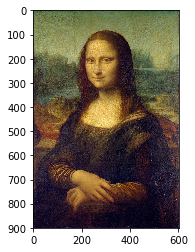

In [71]:
m=mpimg.imread('/Users/Yanean/Desktop/ML/HW4/monalisa.jpeg')
mona=img_as_float(m)# convert to float between 0.0-1.0
mona.shape
plt.imshow(mona)
plt.show()

In [72]:
length=mona.shape[0]
width=mona.shape[1]
Tdata=[]
for i in range(length):
    for j in range(width):
        Tdata.append([i,j,mona[i][j]])
print(len(Tdata))

543600


In [73]:
randSample=np.random.choice(len(Tdata),5000)
Traindata=[]
for index in randSample:
    Traindata.append(Tdata[index])# Traindata = [Tdata[index] for index in randSample]

In [74]:
train_corrdinate = [[i[0],i[1]] for i in Traindata]
#train_red = [i[2][0] for i in Traindata]
#train_green=[i[2][1] for i in Traindata]
#train_blue=[i[2][2] for i in Traindata]
train_output=[[i[2][0],i[2][1],i[2][2]] for i in Traindata]


In [75]:
Test_corrdinate=[]
for i in range(length):
    for j in range(width):
        Test_corrdinate.append([i,j])
depths=[1,2,3,5,10,15]
Ntrees=[1,3,5,10,100]

The depth is:1


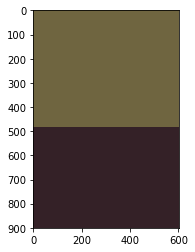

The depth is:2


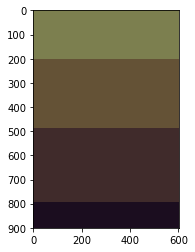

The depth is:3


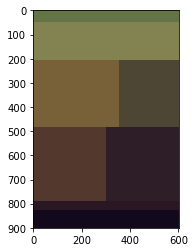

The depth is:5


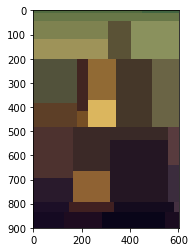

The depth is:10


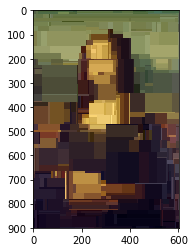

The depth is:15


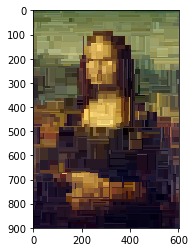

In [63]:
#single tree，different depths
from sklearn.ensemble import RandomForestRegressor
for d in depths:
    print('The depth is:'+ str(d))
    clf=RandomForestRegressor(n_estimators=1,n_jobs=-1,max_depth=d)
    fit=clf.fit(train_corrdinate,train_output)
    Test_output=np.array(clf.predict(Test_corrdinate))
    Test_output = Test_output.reshape(mona.shape[0], mona.shape[1], 3)
    
    plt.imshow(Test_output)
    plt.show()

The number of tree is:1


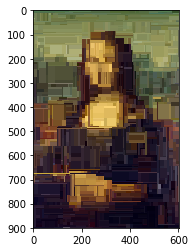

The number of tree is:3


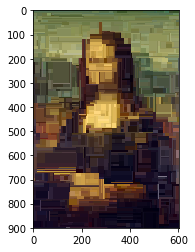

The number of tree is:5


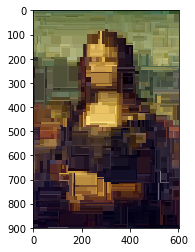

The number of tree is:10


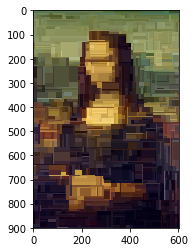

The number of tree is:100


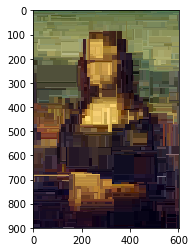

In [76]:
#depth 7, different number of trees
for n in Ntrees:
    print('The number of tree is:'+str(n))
    clf2 = RandomForestRegressor(n_estimators=n,n_jobs=-1,max_depth=7)
    fit2=clf.fit(train_corrdinate,train_output)
    Test_output2=np.array(clf.predict(Test_corrdinate))
    Test_output2=Test_output2.reshape(length,width,3)
    
    plt.imshow(Test_output2)
    plt.show()

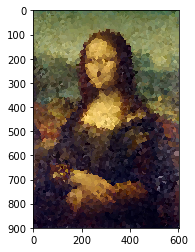

In [77]:
#KNN-regressor
from sklearn.neighbors import KNeighborsRegressor
clf3=KNeighborsRegressor(n_neighbors=1)
fit3=clf3.fit(train_corrdinate,train_output)
test_output3=np.array(clf3.predict(Test_corrdinate))
test_output3=test_output3.reshape(length,width,3)

plt.imshow(test_output3)
plt.show()